In [1]:
import numpy as np
import pandas as pd

In [2]:
env = 'train'

In [3]:
X = np.load(f"data/iemocap/synthesizer/emotion_enc_{env}.npy")

In [4]:
df = pd.read_csv(f"iemocap_meta_{env}.csv").dropna().reset_index(drop=True)

In [5]:
if env == 'train':
    np.random.seed(0)
    indices = np.random.choice(np.arange(len(X)), size=1000, replace=False)
    X = X[indices]
    df = df.iloc[indices].reset_index(drop=True)

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:
from sklearn.manifold import TSNE
X_2d = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0).fit_transform(X)

In [8]:
X.shape, X_2d.shape

((1000, 256), (1000, 2))

In [9]:
cat = {k: i for i, k in enumerate(sorted(set(df.labels)))}
cat

{'Anger': 0,
 'Disgust': 1,
 'Excited': 2,
 'Fear': 3,
 'Frustration': 4,
 'Happiness': 5,
 'Neutral': 6,
 'Other': 7,
 'Sadness': 8,
 'Surprise': 9}

In [10]:
data = pd.DataFrame(X_2d, columns=['d1', 'd2'])
data['Emotion Label'] = df['labels']
data

,d1,d2,Emotion Label
0,17.170799,2.050041,Frustration
1,-21.453630,-18.680496,Sadness
2,17.368448,8.854028,Neutral
3,0.814878,-45.015114,Frustration
4,23.330460,-0.787482,Frustration
...,...,...,...
995,22.890514,2.913396,Neutral
996,-0.416717,37.842976,Excited
997,16.413095,6.009457,Neutral
998,24.959080,2.813613,Neutral


Text(0.5, 1.0, 't-SNE')

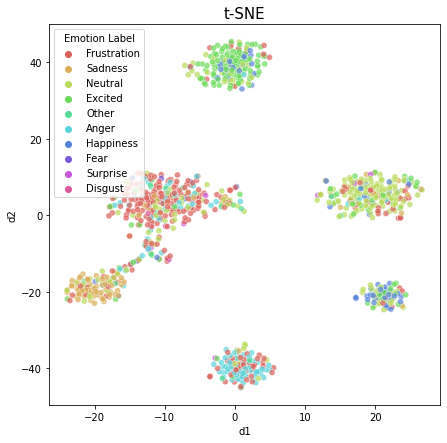

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="d1", y="d2",
    hue="Emotion Label",
    palette=sns.color_palette("hls", len(cat)),
    data=data,
    legend="full",
    alpha=0.7
)
plt.title("t-SNE", fontsize=15)

In [12]:
pca = PCA(n_components=2)

pca_result = pca.fit_transform(X)

In [13]:
data = pd.DataFrame(pca_result, columns=['d1', 'd2'])
data['Emotion Label'] = df['labels']

Text(0.5, 1.0, 'PCA')

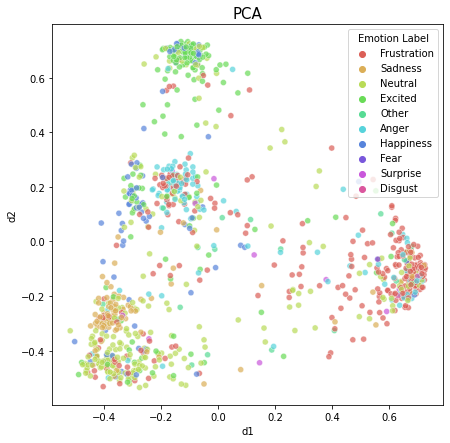

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="d1", y="d2",
    hue="Emotion Label",
    palette=sns.color_palette("hls", len(cat)),
    data=data,
    legend="full",
    alpha=0.7
)
plt.title("PCA", fontsize=15)

### Exploring sound output

In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv("iemocap_meta_test.csv").dropna().reset_index(drop=True)

In [17]:
df = df[df.labels == 'Anger']
df.head(20)

,uttid,text,session,t_file,w_file,labels,m_file,synthesizer_m_file
8,Ses04F_script03_2_M008,"That's a nice point of view, I must say.",data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04F_script03_2_M00...,data/iemocap/synthesizer/mel/Ses04F_script03_2...
22,Ses04F_script01_2_F016,She goes to sleep in his room and his memorial...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04F_script01_2_F01...,data/iemocap/synthesizer/mel/Ses04F_script01_2...
26,Ses04F_impro05_F011,Look fifty dollars is unacceptable. My bag it...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04F_impro05_F011.npy,data/iemocap/synthesizer/mel/Ses04F_impro05_F0...
31,Ses04M_script03_2_M024,"As a matter of fact, that's perfectly true.",data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04M_script03_2_M02...,data/iemocap/synthesizer/mel/Ses04M_script03_2...
36,Ses04M_script03_2_F049,Let go of me. You're a cruel fiend and I hate...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04M_script03_2_F04...,data/iemocap/synthesizer/mel/Ses04M_script03_2...
44,Ses04F_impro08_M025,You know what. I- You know what? You know wha...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04F_impro08_M025.npy,data/iemocap/synthesizer/mel/Ses04F_impro08_M0...
55,Ses04M_script01_1_F023,Now you can go on from there if you know where...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04M_script01_1_F02...,data/iemocap/synthesizer/mel/Ses04M_script01_1...
65,Ses04M_impro08_F018,I have to wait a few weeks for people come go ...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04M_impro08_F018.npy,data/iemocap/synthesizer/mel/Ses04M_impro08_F0...
69,Ses04M_script01_1_F010,What do you want to do? Argue with him?,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04M_script01_1_F01...,data/iemocap/synthesizer/mel/Ses04M_script01_1...
71,Ses04F_impro08_M018,You're going to fill out a form on your desk,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Anger,data/iemocap/encoder/mel/Ses04F_impro08_M018.npy,data/iemocap/synthesizer/mel/Ses04F_impro08_M0...


In [19]:
from playsound import playsound

In [20]:
playsound(df['w_file'].iat[7])

In [21]:
df['text'].at[65]

"I have to wait a few weeks for people come go through my things to get the money back that I didn't spend?"

In [22]:
df['w_file'].at[65]

'data/downloaded/IEMOCAP_full_release/Session4/sentences/wav/Ses04M_impro08/Ses04M_impro08_F018.wav'

### Data Exploration

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv("iemocap_meta.csv")

In [25]:
df

,uttid,text,session,t_file,w_file,labels,m_file,synthesizer_m_file
0,Ses04F_script02_1_M000,What time is it? They're supposed to run arou...,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Frustration,data/iemocap/encoder/mel/Ses04F_script02_1_M00...,data/iemocap/synthesizer/mel/Ses04F_script02_1...
1,Ses04F_script02_1_M001,"Actually, I wanted to go a little farther up t...",data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Frustration,data/iemocap/encoder/mel/Ses04F_script02_1_M00...,data/iemocap/synthesizer/mel/Ses04F_script02_1...
2,Ses04F_script02_1_F000,Fine.,data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Sadness,NaN,NaN
3,Ses04F_script02_1_M002,"Is that, is that-that's just foam isn't it? I...",data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Excited,data/iemocap/encoder/mel/Ses04F_script02_1_M00...,data/iemocap/synthesizer/mel/Ses04F_script02_1...
4,Ses04F_script02_1_M003,"although if you can't tell, it probably isn't ...",data/downloaded/IEMOCAP_full_release/Session4,data/downloaded/IEMOCAP_full_release/Session4/...,data/downloaded/IEMOCAP_full_release/Session4/...,Frustration,data/iemocap/encoder/mel/Ses04F_script02_1_M00...,data/iemocap/synthesizer/mel/Ses04F_script02_1...
...,...,...,...,...,...,...,...,...
10034,Ses01M_script01_1_F041,"Well, you don't think like that.",data/downloaded/IEMOCAP_full_release/Session1,data/downloaded/IEMOCAP_full_release/Session1/...,data/downloaded/IEMOCAP_full_release/Session1/...,Anger,data/iemocap/encoder/mel/Ses01M_script01_1_F04...,data/iemocap/synthesizer/mel/Ses01M_script01_1...
10035,Ses01M_script01_1_M041,I am thinking like that.,data/downloaded/IEMOCAP_full_release/Session1,data/downloaded/IEMOCAP_full_release/Session1/...,data/downloaded/IEMOCAP_full_release/Session1/...,Anger,NaN,NaN
10036,Ses01M_script01_1_F042,"I don't understand you, do I?",data/downloaded/IEMOCAP_full_release/Session1,data/downloaded/IEMOCAP_full_release/Session1/...,data/downloaded/IEMOCAP_full_release/Session1/...,Anger,data/iemocap/encoder/mel/Ses01M_script01_1_F04...,data/iemocap/synthesizer/mel/Ses01M_script01_1...
10037,Ses01M_script01_1_M042,"No, you don't. I'm a pretty tough guy.",data/downloaded/IEMOCAP_full_release/Session1,data/downloaded/IEMOCAP_full_release/Session1/...,data/downloaded/IEMOCAP_full_release/Session1/...,Sadness,data/iemocap/encoder/mel/Ses01M_script01_1_M04...,data/iemocap/synthesizer/mel/Ses01M_script01_1...


In [26]:
df = df.drop_duplicates('uttid')

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_idx, dev_test_idx = list(sss.split(df, df['labels']))[0]

In [29]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
dev_idx, test_idx = list(sss.split(df.iloc[dev_test_idx], df.iloc[dev_test_idx]['labels']))[0]

In [30]:
df_train, df_dev, df_test = df.iloc[train_idx], df.iloc[dev_idx], df.iloc[test_idx]

<AxesSubplot:ylabel='None'>

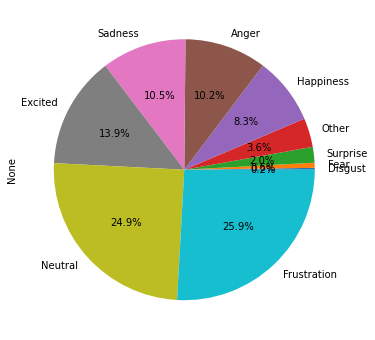

In [31]:
df.groupby("labels").size().sort_values().plot(kind='pie', autopct='%.1f%%', figsize=(6, 6))

<AxesSubplot:ylabel='None'>

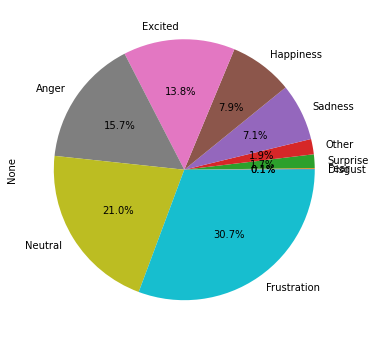

In [32]:
df_dev.groupby("labels").size().sort_values().plot(kind='pie', autopct='%.1f%%', figsize=(6, 6))

In [33]:
# df_train.to_csv("iemocap_meta_train.csv", index=False)
# df_dev.to_csv("iemocap_meta_dev.csv", index=False)
# df_test.to_csv("iemocap_meta_test.csv", index=False)